<a href="https://colab.research.google.com/github/samuel-zahner/Intro-to-AI/blob/main/FireMaze_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#%matplotlib inlin
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import numpy as np
import random
import heapq
import timeit
import time as tm


## Code for Plotting

In [ ]:
#** code for plotting **

step_size = 10
start_color = np.array([0,0,255]) #blue
goal_color = np.array([0,255,0]) #green
obstacle_color = np.array([0,0,0])#black
neighbor_color = np.array([220,220,220])#gray
fringe_color = np.array([128,128,128])#yellow
fire_color = np.array([255,0,0])#red
node_color = np.array([255,165,0])#orange

#plotting obstacles in maze given a set
def plot_obstacle(obstacle_set, dim):
    fig = plt.figure()

    prob_map = np.zeros((step_size*dim,step_size*dim,3)).astype(int) + 255
    # add grid
    prob_map[step_size-1::step_size,:,:] = 0
    prob_map[:,step_size-1::step_size,:] = 0

    
    #setting specific grid boxes to their color
    prob_map[0:step_size-1,:step_size-1] = start_color
    prob_map[step_size*(dim-1):step_size*(dim-1)+step_size-1,step_size*(dim-1):step_size*(dim-1)+step_size-1] = goal_color
    plt.xticks([], [])
    plt.yticks([], [])
    
    for i in range(dim):
        for j in range(dim):
            if (i,j) in obstacle_set:
                prob_map[step_size*i:step_size*i + step_size-1, step_size*j:step_size*j + step_size-1] = obstacle_color
    plt.imshow(prob_map)
    
#setting the color for a specific node
def node_plot(prob_map, node, color, alpha=1.0):
    prob_map[node[0]*step_size:node[0]*step_size+step_size-1,node[1]*step_size:node[1]*step_size+step_size-1] = color*alpha
    

#plot the given path from start to goal
def path_plot(path, dim, obstacle_set):
    # plot given the info as listed 
    prob_map = np.zeros((step_size*dim,step_size*dim,3)).astype(int) + 255
    # add grid
    prob_map[step_size-1::step_size,:,:] = 0
    prob_map[:,step_size-1::step_size,:] = 0
    
    for i in range(dim):
        for j in range(dim):
            if (i,j) in obstacle_set:
                prob_map[step_size*i:step_size*i + step_size-1, step_size*j:step_size*j + step_size-1] = obstacle_color
    
    #plot path nodes through node_plot()
    for i in range(len(path)):
        node = path[i]
        node_plot(prob_map, node, node_color, alpha=i/len(path)+1.0)

    prob_map[0:step_size-1,:step_size-1] = start_color
    prob_map[step_size*(dim-1):step_size*(dim-1)+step_size-1,step_size*(dim-1):step_size*(dim-1)+step_size-1] = goal_color


    plt.xticks([], [])
    plt.yticks([], [])

    img = plt.imshow(prob_map)
    return img

## DFS

In [ ]:
#Depth first search algorithm
#returns boolean of whether there is a path 
def dfs_search(dim, obstacle_set):
    transitions = [(0,-1),(-1,0),(0,1),(1,0)]
    start = (0,0)
    goal = (dim-1, dim-1)
    explored_spaces = set([])
    fringe = [(start, [])] #fringe keeps track of the path taken to get to each node
    win_flag = False

    
    while len(fringe) > 0:
        node, path = fringe.pop(-1)#pop most recently added node
    
        #do not append to path if node is in explored_spaces or obstacle_set
        if node in explored_spaces:
            continue
        if node in obstacle_set:
            continue
        
        #append node to path
        path.append(node)
    
        if node[0] == goal[0] and node[1] == goal[1]:
            #print("You have found the goal")
            win_flag = True
            break
        
        #expand all of the neighbors of current node and add to fringe
        for i in range(len(transitions)):
            dy, dx = transitions[i]
        
            x = node[0] + dx
            y = node[1] + dy
            
            #check if node is valid
            if x < 0 or y < 0 or x > dim-1 or y > dim-1:
                continue
            if (x,y) in explored_spaces:
                continue
            if (x,y) in obstacle_set:
                continue
            if (x,y) not in fringe:
                fringe.append(((x,y), path[:]))
    
        explored_spaces.add(node)
        
    if win_flag == False:
        #print("There is no path from start to goal")
        return False
    
    #print("Path length: " + str(len(path)-1))
    #path_plot(path, dim, fire_set)
    return True

## BFS

In [ ]:
#Breadth First Search algorithm
#Returns boolean of whether there is a path and the number of nodes it explored
def bfs_search(dim, obstacle_set):
    transitions = [(0,-1),(-1,0),(0,1),(1,0)]
    start = (0,0)
    goal = (dim-1, dim-1)
    explored_spaces = set([])
    fringe = [(start, [])]
    win_flag = False
    num_explored = 0


    while len(fringe) > 0:
        node, shortest_path = fringe.pop(0)#pop the first element added to the fringe
        
        #check if node is valid
        if node in explored_spaces:
            continue
        if node in obstacle_set:
            continue
            
        #append node to path
        shortest_path.append(node)
        
        #increase counter to keep track of total nodes explored
        num_explored += 1
        if node[0] == goal[0] and node[1] == goal[1]:
            #print("You have found the goal")
            win_flag = True
            break

        #expand neighbors and add to fringe
        for i in range(len(transitions)):
            dy, dx = transitions[i]
        
            x = node[0] + dx
            y = node[1] + dy
        
            #check if neighbor is valid
            if x < 0 or y < 0 or x > dim-1 or y > dim-1:
                continue
            if (x,y) in explored_spaces:
                continue
            if (x,y) in obstacle_set:
                continue
            if (x,y) not in fringe:
                fringe.append(((x,y), shortest_path[:]))
       
    
        explored_spaces.add(node)
        
    if win_flag == False:
        #print("There is no path from start to goal")
        return (False, num_explored)
    
    
    #print("Shortest path: " + str(len(shortest_path)-1))
    #path_plot(shortest_path, dim, fire_set)
    return (True, num_explored)

## A*

In [ ]:
#helper method to calculate euclidean heuristic
def euclidean(start,end):
    #print(start, end)
    distance = ((end[0]-start[0])**2 + (end[1]-start[1])**2)**0.5
    return distance

In [ ]:
#A* search
#returns boolean if there is a path and number of nodes it explored
def A_search(dim, obstacle_set):
    transitions = [(0,-1),(-1,0),(0,1),(1,0)]
    start = (0,0)
    goal = (dim-1, dim-1)
    explored_spaces = set([])
    #fringe is a heap, sorted by the least heuristic
    #heuristic = distance traveled so far + euclidean estimate
    fringe = [(euclidean(start,goal), 0, start, [])]
    heapq.heapify(fringe)
    win_flag = False
    num_explored = 0


    while len(fringe) > 0:
        #print(fringe)
        heuristic, distance, node, path = heapq.heappop(fringe)#pop the minimum value from the fringe
        
        #check if node is valid
        if node in explored_spaces:
            continue
        if node in obstacle_set:
            continue
            
        path.append(node)#append to path 
        
        num_explored += 1
        if node[0] == goal[0] and node[1] == goal[1]:
            #print("You have found the goal")
            win_flag = True
            break
        
        #for each new node popped, increase the distance traveled by 1
        distance += 1
        #expand neighbors and add to fringe
        for i in range(len(transitions)):
            dy, dx = transitions[i]
        
            x = node[0] + dx
            y = node[1] + dy
            
            #check if valid
            if x < 0 or y < 0 or x > dim-1 or y > dim-1:
                continue
            if (x,y) in explored_spaces:
                continue
            if (x,y) in obstacle_set:
                continue
            if (x,y) not in fringe:
                #heappush pushes to the fringe while keeping the heap intact
                heapq.heappush(fringe, (distance + euclidean((x,y),goal), distance, (x,y), path[:]))
       
        explored_spaces.add(node)
        
    if win_flag == False:
        #print("There is no path from start to goal")
        return (False, num_explored)
    
    
    #print("A* path: " + str(len(path)-1))
    #path_plot(path, dim, fire_set)
    return (True, num_explored)

## Plot Obstacle Maze

Enter dimension of maze: 10
Enter probability of obstacles: .2


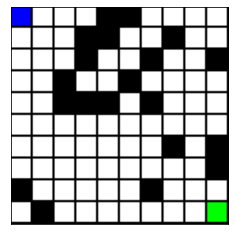

In [ ]:
#take input from user
while True:
    try:
        dim = int(input("Enter dimension of maze: "))
        if dim < 3:
            raise ValueError #this will send it to the print message and back to the input option
        break
    except ValueError:
        print("Invalid integer. Dimension must be at least 3.")

while True:
    try:
        p = float(input("Enter probability of obstacles: "))
        if p < 0 or p > 1:
            raise ValueError #this will send it to the print message and back to the input option
        break
    except ValueError:
        print("Invalid integer. Probability must be in the range (0,1).")



#print(dim)
#print(p)

#add to obstacle set
obstacle_set = set([])
for i in range(dim):
    for j in range(dim):
        if i == 0 and j == 0 or i == dim-1 and j == dim-1:
            continue
        if random.uniform(0,1) < p:
            obstacle_set.add((i,j))
            
plot_obstacle(obstacle_set, dim)



In [ ]:
#DFS
dfs_search(dim, obstacle_set)

True

In [ ]:
#BFS
print(bfs_search(dim, obstacle_set))

(True, 68)


In [ ]:
#A*
print(A_search(dim, obstacle_set))

(True, 58)


## DFS Probability Density Chart

Text(0.5, 0, 'obstacle density p')

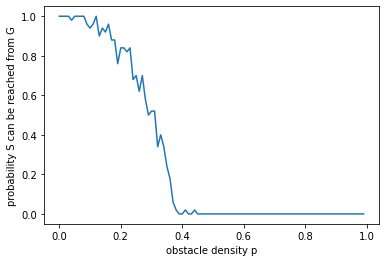

In [ ]:
#Probability Density Chart for DFS
success = 0
probabilities = []
success_percentage = []
dim = 80 #max dimension set to 80 X 80
for p in np.arange(0,1,0.01):
  success = 0
  #get 50 examples for each value of p
  for count in range(50):
    obstacle_set = set([])
    #get new obstacle_set
    for i in range(dim):
        for j in range(dim):
            if i == 0 and j == 0 or i == dim-1 and j == dim-1:
                continue
            if random.uniform(0,1) < p:
                obstacle_set.add((i,j))
    #determine if success or not
    if dfs_search(dim, obstacle_set) == True:
      success += 1
  probabilities.append(p)  
  success_percentage.append(success/50)

#plot results
plt.plot(probabilities, success_percentage)
plt.ylabel("probability S can be reached from G")
plt.xlabel("obstacle density p")


## A* and BFS number of nodes explored chart

Text(0.5, 0, 'obstacle density p')

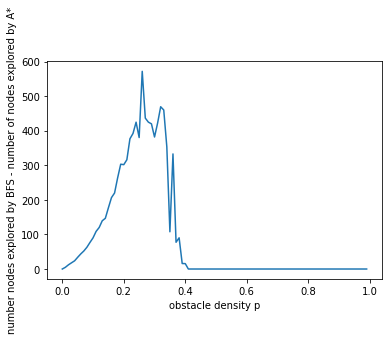

In [ ]:
#A* and BFS chart

counter = 0
probabilities = []
explored_spaces = []
dim = 80 #max dimension set to 80 X 80
for p in np.arange(0,1,0.01):
  counter = 0
  #50 examples for each value of p
  for count in range(50):
    obstacle_set = set([])
    #get new obstacles
    for i in range(dim):
        for j in range(dim):
            if i == 0 and j == 0 or i == dim-1 and j == dim-1:
                continue
            if random.uniform(0,1) < p:
                obstacle_set.add((i,j))
    #subtract BFS - A* for number of nodes explored            
    counter += (int(bfs_search(dim, obstacle_set)[1]) - int(A_search(dim, obstacle_set)[1]))
            
    #print(bfs_search(dim, obstacle_set)[1])
    #print(A_search(dim, obstacle_set)[1])
    #print(counter)
      
  probabilities.append(p)  
  explored_spaces.append(counter/50)

#plot results
plt.plot(probabilities, explored_spaces)
plt.ylabel("number nodes explored by BFS - number of nodes explored by A*")
plt.xlabel("obstacle density p")

## Problem 4

In [ ]:
#Timing DFS
dim = 8000
obstacle_set = set([])
for i in range(dim):
    for j in range(dim):
        if i == 0 and j == 0 or i == dim-1 and j == dim-1:
            continue
        if random.uniform(0,1) < .3:
            obstacle_set.add((i,j))
start_ = tm.time()
dfs_search(dim, obstacle_set)
end = tm.time()
print(end-start_)

55.55554485321045


10000 --> 99.1225

9000 --> 78.365

8000 --> 55.556

In [ ]:
#Timing DFS
time_ = 0
dim = 12000
while time_ <= 60:
  dim += 1
  obstacle_set = set([])
  for i in range(dim):
      for j in range(dim):
          if i == 0 and j == 0 or i == dim-1 and j == dim-1:
              continue
          if random.uniform(0,1) < .3:
              obstacle_set.add((i,j))
  print(dim)
  start_ = tm.time()
  dfs_search(dim, obstacle_set)
  end_ = tm.time()
  time = end - start
  print('time:  ',time)
print("time taken:  ", time)
print("dim size:   ",dim-1)

In [ ]:
#Timing BFS
dim = 1150
obstacle_set = set([])
for i in range(dim):
    for j in range(dim):
        if i == 0 and j == 0 or i == dim-1 and j == dim-1:
            continue
        if random.uniform(0,1) < .3:
            obstacle_set.add((i,j))
start_ = tm.time()
bfs_search(dim, obstacle_set)
end = tm.time()
print(end-start_)

59.50907802581787


1150 --> 58.9778

In [ ]:
#Timing A*
dim = 900
obstacle_set = set([])
for i in range(dim):
    for j in range(dim):
        if i == 0 and j == 0 or i == dim-1 and j == dim-1:
            continue
        if random.uniform(0,1) < .3:
            obstacle_set.add((i,j))
start_ = tm.time()
A_search(dim, obstacle_set)
end = tm.time()
print(end-start_)

52.68498229980469


900 --> 52.6849

## Advancing fire by flammability

In [ ]:
#Add Fire to maze
def advance_fire_one_step(obstacle_set, fire_set,dim,q):
    for i in range(dim):
        for j in range(dim):
            node = (i,j)
            if node not in obstacle_set and node not in fire_set:
                count = 0
                if (node[0]+1,node[1]) in fire_set and node[0]+1 < dim:
                    count += 1
                if (node[0]-1,node[1]) in fire_set and node[0]+1 > -1:
                    count += 1
                if (node[0],node[1]+1) in fire_set and node[1]+1 < dim:
                    count += 1
                if (node[0],node[1]-1) in fire_set and node[1]+1 > -1:
                    count += 1
                prob = 1 - (1-q)**count
                if random.uniform(0,1) <= prob:
                    fire_set.add((i,j)) #append node to fire_set
    return fire_set

In [ ]:
#plot path with fire and obstacles
def path_fire_plot(path, dim, obstacle_set, fire_set):
    # plot given the info as listed 
    #fig = plt.figure()
    prob_map = np.zeros((step_size*dim,step_size*dim,3)).astype(int) + 255
    # add grid
    prob_map[step_size-1::step_size,:,:] = 0
    prob_map[:,step_size-1::step_size,:] = 0
    
    for i in range(dim):
        for j in range(dim):
            if (i,j) in obstacle_set:
                prob_map[step_size*i:step_size*i + step_size-1, step_size*j:step_size*j + step_size-1] = obstacle_color
    for i in range(dim):
        for j in range(dim):
            if (i,j) in fire_set:
                prob_map[step_size*i:step_size*i + step_size-1, step_size*j:step_size*j + step_size-1] = fire_color
    for i in range(len(path)):
        node = path[i]
        node_plot(prob_map, node, node_color, alpha=i/len(path)+1.0)

    prob_map[0:step_size-1,:step_size-1] = start_color
    prob_map[step_size*(dim-1):step_size*(dim-1)+step_size-1,step_size*(dim-1):step_size*(dim-1)+step_size-1] = goal_color


    plt.xticks([], [])
    plt.yticks([], [])

    img = plt.imshow(prob_map)
    return img

In [ ]:
#plot the where the current node is with the obstacles and current state of fire
def plot_obstacles_fire(obstacle_set, fire_set, dim, current_node):
    fig = plt.figure()

    prob_map = np.zeros((step_size*dim,step_size*dim,3)).astype(int) + 255
    # add grid
    prob_map[step_size-1::step_size,:,:] = 0
    prob_map[:,step_size-1::step_size,:] = 0


    prob_map[0:step_size-1,:step_size-1] = start_color
    prob_map[step_size*(dim-1):step_size*(dim-1)+step_size-1,step_size*(dim-1):step_size*(dim-1)+step_size-1] = goal_color
    plt.xticks([], [])
    plt.yticks([], [])
    
    for i in range(dim):
        for j in range(dim):
            if (i,j) in obstacle_set:
                prob_map[step_size*i:step_size*i + step_size-1, step_size*j:step_size*j + step_size-1] = obstacle_color
    for i in range(dim):
        for j in range(dim):
            if (i,j) in fire_set:
                prob_map[step_size*i:step_size*i + step_size-1, step_size*j:step_size*j + step_size-1] = fire_color
    node_plot(prob_map, current_node, node_color, alpha=1.0)
    plt.imshow(prob_map)

## STAGE 1 (plan from the start)

In [ ]:
#STAGE 1
#this algorithm is A* 
#returns path from start to goal
def plan(start, goal, obstacle_set, fire_set):
    transitions = [(0,-1),(-1,0),(0,1),(1,0)]
    explored_spaces = set([])
     #fringe is a heap, sorted by the least heuristic
    #heuristic = distance traveled so far + euclidean estimate
    fringe = [(euclidean(start,goal), 0, start, [])]
    heapq.heapify(fringe)
    win_flag = False


    while len(fringe) > 0:
        #print(fringe)
        heuristic, distance, node, path = heapq.heappop(fringe)#pops the minimum element
        
        #check if node is valid
        if node in explored_spaces:
            continue
        if node in obstacle_set:
            continue
        if node in fire_set:
            continue
            
        path.append(node)#append node to path
        if node[0] == goal[0] and node[1] == goal[1]:
            #print("You have found the goal")
            win_flag = True
            break

        #for each new node popped, increase the distance traveled by 1
        distance += 1
        
        #expand neighbors and add to fringe
        for i in range(len(transitions)):
            dy, dx = transitions[i]
        
            x = node[0] + dx
            y = node[1] + dy
        
            #check if valid
            if x < 0 or y < 0 or x > dim-1 or y > dim-1:
                continue
            if (x,y) in explored_spaces:
                continue
            if (x,y) in obstacle_set:
                continue
            if (x,y) in fire_set:
                continue
            if (x,y) not in fringe:
                #heappush pushes to the fringe while keeping the heap intact
                heapq.heappush(fringe, (distance + euclidean((x,y),goal), distance, (x,y), path[:]))
       
        explored_spaces.add(node)
        
    if win_flag == False:
        print("There is no path from start to goal")
        return path, win_flag
    
    
    #print("A* path: " + str(len(path)-1))
    #path_plot(path, dim, obstacle_set)
    return path, win_flag
    

In [ ]:
#steps through the planned path 
#advances the fire each step
#prints the result
def execute_plan(start, goal, obstacle_set, fire_set, path, dim):
    for i in range(len(path)):
        fire_set = advance_fire_one_step(obstacle_set, fire_set, dim, q=0.1)#advances the fire
        node = path[i]
        #check if current node is on fire
        if node in fire_set:
            print("Dead!")
            return
        plot_obstacles_fire(obstacle_set, fire_set, dim, node)
    print("You won!")

here
You won!


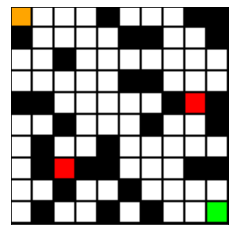

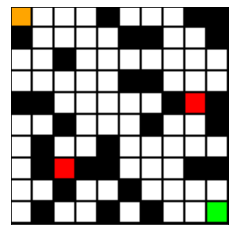

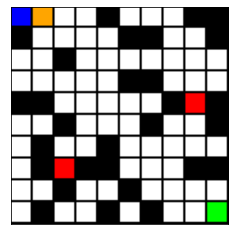

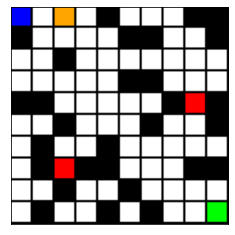

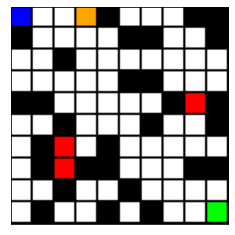

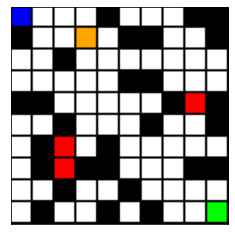

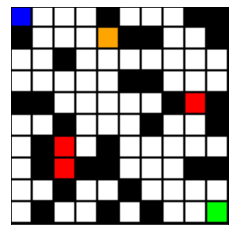

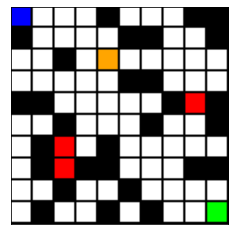

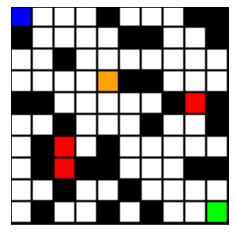

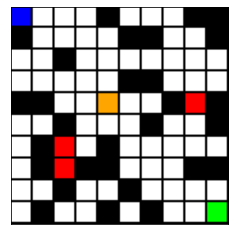

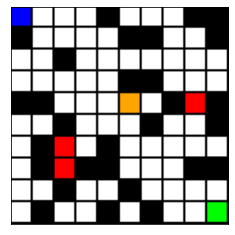

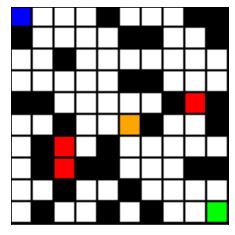

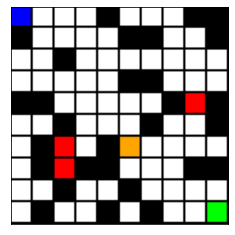

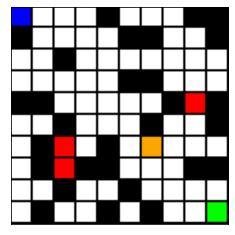

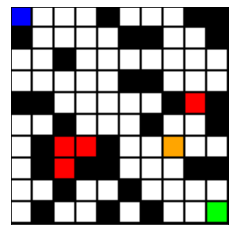

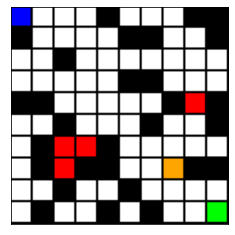

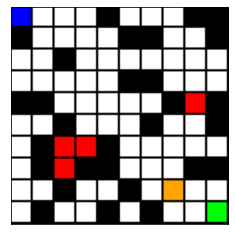

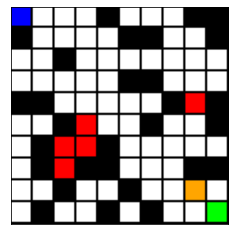

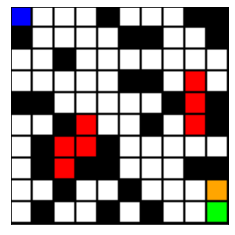

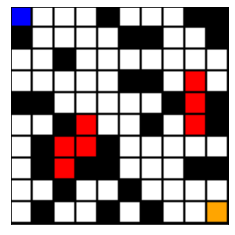

In [ ]:
obstacle_set = set([])
dim = 10
for i in range(dim):
    for j in range(dim):
        if i == 0 and j == 0 or i == dim-1 and j == dim-1:
            continue
        if random.uniform(0,1) < .3:
            obstacle_set.add((i,j))
start = (0,0)
goal = (dim-1, dim-1)
fire_set = set([])
fire_set.add((7,2))
fire_set.add((4,8))

plot_obstacles_fire(obstacle_set, fire_set, dim, (0,0))
planned_path, win_flag = plan(start, goal, obstacle_set, fire_set)
if(win_flag):
    print("here")
    execute_plan(start, goal, obstacle_set, fire_set, planned_path, dim)

## STAGE 2 (dynamic planning)

In [ ]:
#executes given path
#plans a new path after each step - taking into account how the fire spread
#advances fire after each step
def execute_each_step(start, goal, obstacle_set, fire_set, path, dim):
    dead = False
    node = start
    while not dead:
        if node == goal:
            print("You win!")
            break
        node = path[1]
        fire_set = advance_fire_one_step(obstacle_set, fire_set, dim, q=0.1)#advance fire 
        #set new start as path[1] and plan again
        path, win_flag = plan(path[1], goal, obstacle_set, fire_set)
        if win_flag == False:
            print("No path")
            dead = True
            break
        
        #check if node is on fire
        if node in fire_set:
            print("Dead!")
            dead = True
            break
        plot_obstacles_fire(obstacle_set, fire_set, dim, node)

You win!


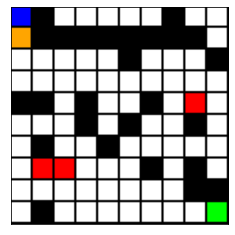

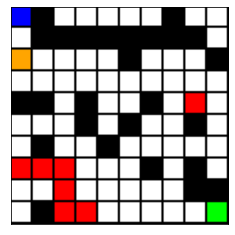

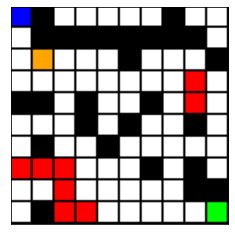

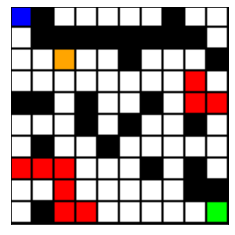

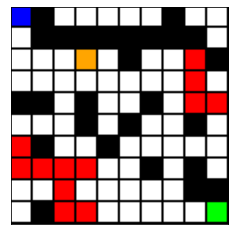

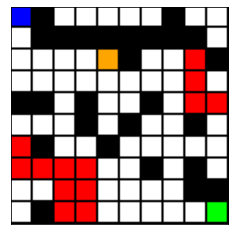

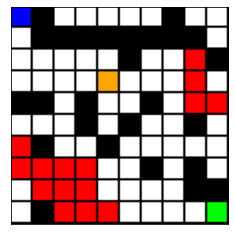

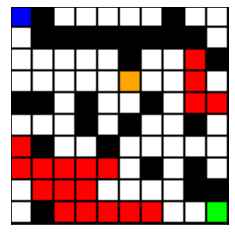

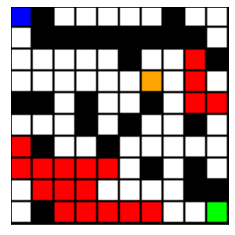

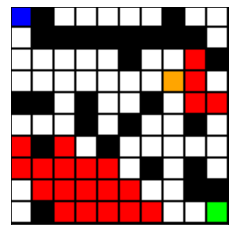

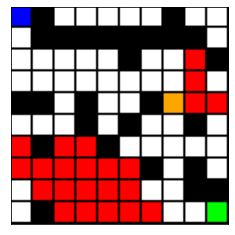

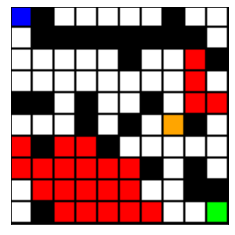

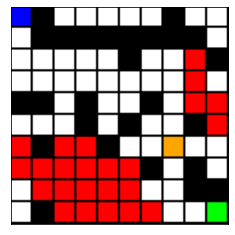

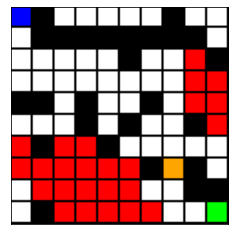

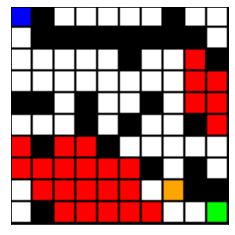

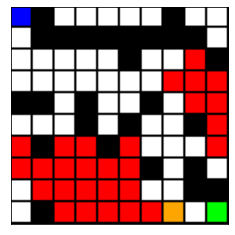

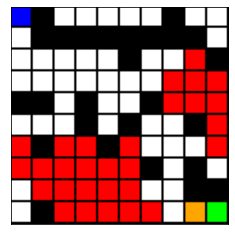

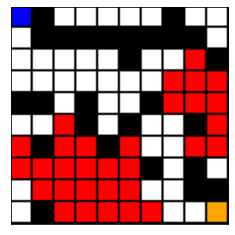

In [ ]:
obstacle_set = set([])
dim = 10
for i in range(dim):
    for j in range(dim):
        if i == 0 and j == 0 or i == dim-1 and j == dim-1:
            continue
        if random.uniform(0,1) < .3:
            obstacle_set.add((i,j))
fire_set_two = set([])
fire_set_two.add((7,2))
fire_set_two.add((4,8))

starting_path, win_flag = plan(start, goal, obstacle_set, fire_set_two)
if win_flag:
    execute_each_step(start, goal, obstacle_set, fire_set_two, starting_path, dim)


## STAGE 3 (reworked algorithm)

What do?:

- Create fire neighbors set
- A* or BFS and check path to avoid nodes in fire_neighbors set
- exception case: if only path left, have to go down

In [ ]:
def advance_fire_one_step_stage3(obstacle_set,fire_set,dim,q):
    for i in range(dim):
        for j in range(dim):
            node = (i,j)
            if node not in obstacle_set and node not in fire_set:
                count = 0
                if (node[0]+1,node[1]) in fire_set and node[0]+1 < dim:
                    count += 1
                if (node[0]-1,node[1]) in fire_set and node[0]+1 > -1:
                    count += 1
                if (node[0],node[1]+1) in fire_set and node[1]+1 < dim:
                    count += 1
                if (node[0],node[1]-1) in fire_set and node[1]+1 > -1:
                    count += 1
                prob = 1 - (1-q)**count
                if random.uniform(0,1) <= prob:
                    fire_set.add((i,j)) #append node to fire_set
    fire_neighbors = fire_neighbors_fnc(fire_set,dim,obstacle_set)
    return fire_set,fire_neighbors

In [ ]:
def fire_neighbors_fnc(fire_set, dim, obstacle_set):
  fire_neighbors = set([])

  for node in fire_set:

    if (node[0]+1,node[1]) not in fire_set and (node[0]+1,node[1]) not in obstacle_set:
      if node[0]+1 < dim:
        fire_neighbors.add((node[0]+1,node[1]))

    if (node[0]-1,node[1]) in fire_set and (node[0]-1,node[1]) not in obstacle_set:
      if node[0]-1 > -1:
        fire_neighbors.add((node[0]-1,node[1]))

    if (node[0],node[1]+1) in fire_set and (node[0],node[1]+1) not in obstacle_set:
      if node[1]+1 < dim:
        fire_neighbors.add((node[0],node[1]+1))    

    if (node[0],node[1]-1) in fire_set and (node[0],node[1]-1) not in obstacle_set:
      if node[1]-1 > 0:
        fire_neighbors.add((node[0],node[1]-1))   

  return fire_neighbors

In [ ]:
def new_plan(start, goal, obstacle_set, fire_set, fire_neighbors):
    transitions = [(0,-1),(-1,0),(0,1),(1,0)]
    explored_spaces = set([])
     #fringe is a heap, sorted by the least heuristic
    #heuristic = distance traveled so far + euclidean estimate
    fringe = [(euclidean(start,goal), 0, start, [])]
    heapq.heapify(fringe)
    win_flag = False


    while len(fringe) > 0:
        #print(fringe)
        heuristic, distance, node, path = heapq.heappop(fringe)#pops the minimum element
        
        #check if node is valid
        if node in explored_spaces:
            continue
        if node in obstacle_set:
            continue
        if node in fire_set:
            continue
        #if node in fire_neighbors:
            #continue
            
        path.append(node)#append node to path
        if node[0] == goal[0] and node[1] == goal[1]:
            #print("You have found the goal")
            win_flag = True
            break

        #for each new node popped, increase the distance traveled by 1
        distance += 1
        
        #expand neighbors and add to fringe
        for i in range(len(transitions)):
            dy, dx = transitions[i]
        
            x = node[0] + dx
            y = node[1] + dy
        
            #check if valid
            if x < 0 or y < 0 or x > dim-1 or y > dim-1:
                continue
            if (x,y) in explored_spaces:
                continue
            if (x,y) in obstacle_set:
                continue
            if (x,y) in fire_set:
                continue
            if (x,y) in fire_neighbors:
                continue
            if (x,y) not in fringe:
                #heappush pushes to the fringe while keeping the heap intact
                heapq.heappush(fringe, (distance + euclidean((x,y),goal), distance, (x,y), path[:]))
       
        explored_spaces.add(node)
    #accounts for path being empty (means they died when fire in (0,0))
    if path is None:
        return path, False         
    if win_flag == False:
        print("There is no path from start to goal")
        path, flag = plan(path[0], goal, obstacle_set, fire_set)
        if flag == False:
            print("No path")
        return path, flag
    
    
    #print("A* path: " + str(len(path)-1))
    path_plot(path, dim, obstacle_set)
    return path, win_flag

In [ ]:
def execute_each_step_stage3(start, goal, obstacle_set, fire_set, fire_neighbors, path, dim):
    dead = False
    node = start
    
    while not dead:
        if node == goal:
            print("You win!")
            break
        node = path[1]
        fire_set = advance_fire_one_step(obstacle_set, fire_set, dim, q=0.1)#advance fire 
        #set new start as path[1] and plan again
        path, flag = new_plan(path[1], goal, obstacle_set, fire_set, fire_neighbors)
        if flag == False:
            print("No path")
            dead = True
            break
        
        #check if node is on fire
        if node in fire_set:
            print("Dead!")
            dead = True
            break
        plot_obstacles_fire(obstacle_set, fire_set, dim, node)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

You win!


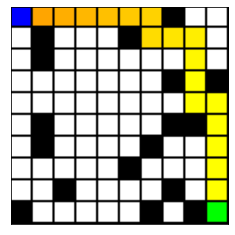

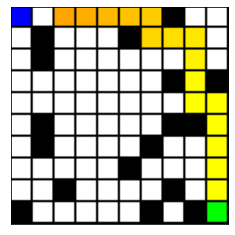

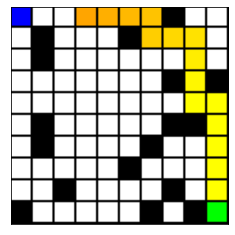

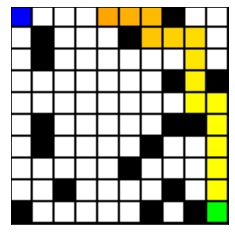

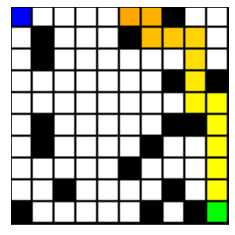

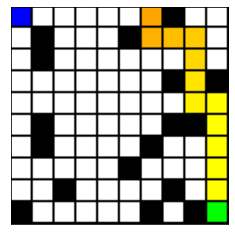

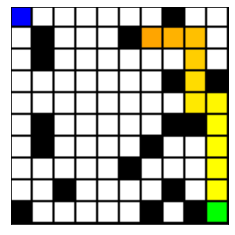

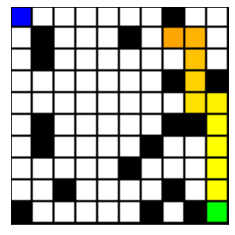

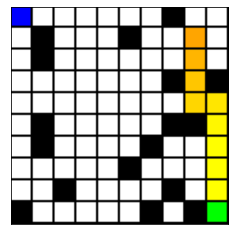

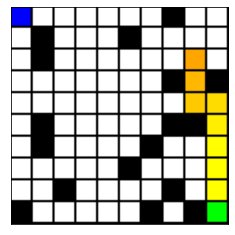

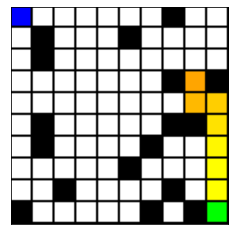

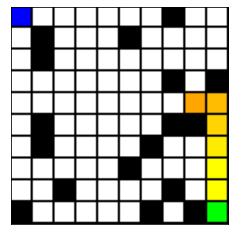

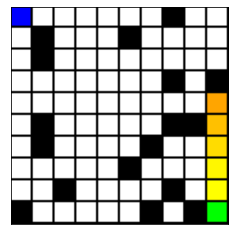

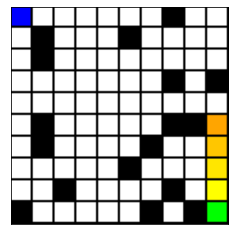

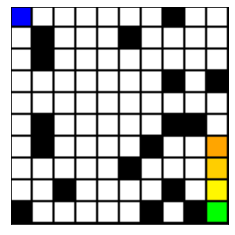

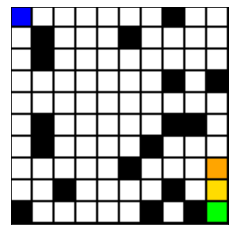

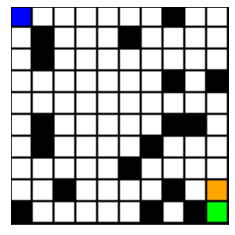

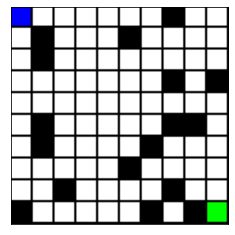

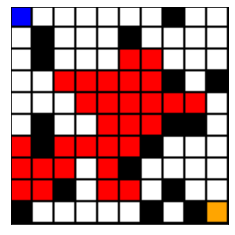

In [ ]:
obstacle_set = set([])
dim =10
for i in range(dim):
    for j in range(dim):
        if i == 0 and j == 0 or i == dim-1 and j == dim-1:
            continue
        if random.uniform(0,1) < .2:
            obstacle_set.add((i,j))


fire_set_two = set([])
fire_set_two.add((5,5))
fire_set_two.add((7,2))

plot_obstacles_fire(obstacle_set, fire_set_two, dim, (0,0))
fire_neighbors = fire_neighbors_fnc(fire_set_two, dim, obstacle_set)
starting_path, flag = new_plan(start, goal, obstacle_set, fire_set_two, fire_neighbors)
if flag:
    execute_each_step_stage3(start, goal, obstacle_set, fire_set_two,fire_neighbors, starting_path, dim)

## Problem 6 (flamability density plot)

You won!
You won!
You won!
You won!
You won!
You won!
You won!
You won!
You won!
You won!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
You won!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
Dead!
D

Text(0.5, 0, 'flammability q')

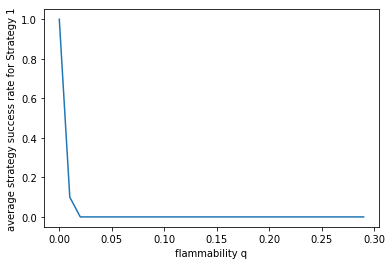

In [ ]:
#Flamability Density Chart for Stage 1
success = 0
probabilities = []
success_percentage = []

#max dimension set to 80 X 80
dim = 80
for q in np.arange(0,.3,0.01):
  success = 0
  count = 0
  start = (0,0)
  goal = (dim-1, dim-1)
  #max_counter prevents infinite loop when no paths are available
  max_counter = 0
  #get 10 examples for each value of q
  while count < 10:
    max_counter += 1
    obstacle_set = set([])
    fire_set = set([])
    #get new obstacle_set and new fire_set
    for i in range(dim):
        for j in range(dim):
            if i == 0 and j == 0 or i == dim-1 and j == dim-1:
                continue
            if random.uniform(0,1) < 0.3:
                obstacle_set.add((i,j))
    for i in range(dim):
        for j in range(dim):
            if i == 0 and j == 0 or i == dim-1 and j == dim-1:
                continue
            if (i,j) in obstacle_set:
                continue
            if random.uniform(0,1) < 0.01:
                fire_set.add((i,j))
    #determine if success or not
    planned_path, win_flag = plan(start, goal, obstacle_set, fire_set)
    if (win_flag is True):
      max_counter = 0
      count+=1
      #if there is a viable path, we will use our strategy 1 to solve the maze
      if (execute_plan(start, goal, obstacle_set, fire_set, planned_path, dim, q) is True):
        success += 1
    #if there are 50 mazes in a row that are not solvable, we will move onto new q value
    if max_counter == 50:
      count = 10
  probabilities.append(q)  
  success_percentage.append(success/10)

#plot results
plt.plot(probabilities, success_percentage)
plt.ylabel("average strategy success rate for Strategy 1")
plt.xlabel("flammability q")

0.0
You win!
You win!
You win!
You win!
You win!
You win!
You win!
You win!
You win!
You win!
0.01
No path
You win!
You win!
You win!
No path
No path
No path
No path
No path
No path
0.02
No path
You win!
No path
No path
No path
You win!
You win!
No path
No path
No path
0.03
No path
No path
No path
No path
You win!
No path
No path
You win!
No path
No path
0.04
No path
No path
No path
No path
You win!
No path
No path
No path
No path
No path
0.05
No path
No path
No path
No path
No path
No path
No path
No path
No path
No path
0.06
No path
No path
0.07
No path
No path
No path
No path
No path
No path
No path
No path
No path
No path
0.08
No path
No path
No path
No path
No path
No path
No path
No path
No path
No path
0.09
No path
No path
No path
No path
No path
No path
No path
No path
No path
No path
0.1
No path
No path
No path
No path
No path
No path
No path
No path
No path
No path
0.11
No path
No path
No path
No path
No path
No path
No path
No path
No path
No path
0.12
No path
No path
No pat

Text(0.5, 0, 'flammability q')

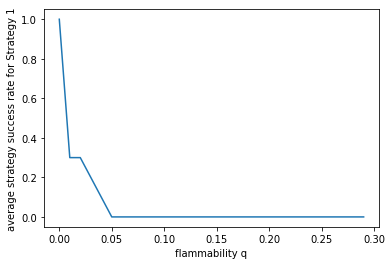

In [ ]:
#Probability Density Chart for Stage 2
success = 0
probabilities = []
success_percentage = []

#max dimension set to 80 X 80
dim = 80
for q in np.arange(0,.3,0.01):
  print(q)
  success = 0
  count = 0
  start = (0,0)
  goal = (dim-1, dim-1)
  #max_counter prevents infinite loop when no paths are available
  max_counter = 0
  #get 10 examples for each value of q
  while count < 10:
    max_counter += 1
    obstacle_set = set([])
    fire_set = set([])
    #get new obstacle_set and fire_set
    for i in range(dim):
        for j in range(dim):
            if i == 0 and j == 0 or i == dim-1 and j == dim-1:
                continue
            if random.uniform(0,1) < 0.3:
                obstacle_set.add((i,j))
    for i in range(dim):
        for j in range(dim):
            if i == 0 and j == 0 or i == dim-1 and j == dim-1:
                continue
            if (i,j) in obstacle_set:
                continue
            if random.uniform(0,1) < .01:
                fire_set.add((i,j))
    #determine if success or not
    planned_path, win_flag = plan(start, goal, obstacle_set, fire_set)
    if (win_flag is True):
      max_counter = 0
      count+=1
      #if there is a viable path, we will use our strategy 2 to solve the maze
      if (execute_each_step(start, goal, obstacle_set, fire_set, planned_path, dim, q) is True):
        success += 1
    #if there are 10 mazes in a row that are not solvable, we will move onto new q value
    if max_counter == 10:
      count = 10
  probabilities.append(q)  
  success_percentage.append(success/10)

#plot results
plt.plot(probabilities, success_percentage)
plt.ylabel("average strategy success rate for Strategy 1")
plt.xlabel("flammability q")

0.0
0.05
0.1
0.15000000000000002
No path
No path
0.2
0.25
No path
0.30000000000000004
No path
0.35000000000000003
No path
0.4
No path
0.45
No path
0.5
No path
No path
No path
0.55
No path
0.6000000000000001
No path
No path
No path
No path
0.65
0.7000000000000001
No path
No path
No path
No path
No path
0.75
No path
No path
No path
No path
No path
No path
0.8
No path
No path
No path
No path
No path
No path
No path
No path
No path
0.8500000000000001
No path
No path
No path
No path
No path
No path
No path
No path
No path
0.9
No path
No path
No path
No path
No path
No path
No path
No path
No path
No path
0.9500000000000001
No path
No path
No path
No path
No path
No path
No path
No path
No path
No path


Text(0.5, 0, 'flammability q')

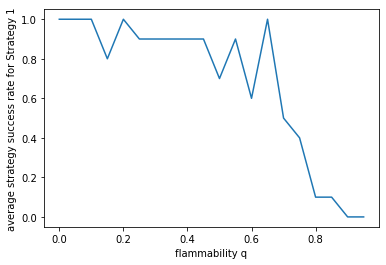

In [ ]:
#Probability Density Chart for Stage 3
success = 0
probabilities = []
success_percentage = []

#max dimension set to 80 X 80
dim = 80
for q in np.arange(0,1,0.05):
  print(q)
  success = 0
  count = 0
  start = (0,0)
  goal = (dim-1, dim-1)
  max_counter = 0

  #get 10 examples for each value of q
  while count < 10:
    max_counter += 1
    obstacle_set = set([])
    fire_set = set([])

    #get new obstacle_set and fire_set
    for i in range(dim):
        for j in range(dim):
            if i == 0 and j == 0 or i == dim-1 and j == dim-1:
                continue
            if random.uniform(0,1) < 0.3:
                obstacle_set.add((i,j))
    for i in range(dim):
        for j in range(dim):
            if i == 0 and j == 0 or i == dim-1 and j == dim-1:
                continue
            if (i,j) in obstacle_set:
                continue
            if random.uniform(0,1) < .01:
                fire_set.add((i,j))

    #determine if success or not
    fire_neighbors = fire_neighbors_fnc(fire_set, dim, obstacle_set)
    starting_path, flag = new_plan(start, goal, obstacle_set, fire_set, fire_neighbors)
    path_start, win_flag = plan(start, goal, obstacle_set, fire_set)
    if (win_flag is True):
      #max_counter = 0
      count+=1
      #if there is a viable path, we will use our strategy 3 to solve the maze
      if (execute_each_step_stage3(start, goal, obstacle_set, fire_set,fire_neighbors, starting_path, dim, q) is True):
        success += 1
    #if max_counter == 20:
      #count = 10

  probabilities.append(q)  
  success_percentage.append(success/10)

#plot results
plt.plot(probabilities, success_percentage)
plt.ylabel("average strategy success rate for Strategy 1")
plt.xlabel("flammability q")